In [52]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
data.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


## Задание 1

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите  до третьего знака после точки. 

In [6]:
n_clicks_exp = np.sum(data[data.slot == 'exp'].n_clicks.values)
n_clicks_control = np.sum(data[data.slot == 'control'].n_clicks.values)

In [10]:
print('В группе exp пользовательских кликов на', (100 * n_clicks_exp / n_clicks_control - 100).round(3),\
      '% больше, чем в группе control.')

В группе exp пользовательских кликов на 1.614 % больше, чем в группе control.


## Задание 2

Постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп.

In [11]:
# Функция, производящая n_samples выборок с возвращением объема len(data)
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [12]:
# Функция, возвращающая границы доверительного интервала, которая использует квантили порядков alpha/2 и 1 - alpha/2
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries

In [17]:
clicks_exp = data[data.slot == 'exp'].n_clicks.values
clicks_control = data[data.slot == 'control'].n_clicks.values

In [18]:
clicks_exp_mean_scores = list(map(np.mean, get_bootstrap_samples(clicks_exp, 1000)))
clicks_control_mean_scores = list(map(np.mean, get_bootstrap_samples(clicks_control, 1000)))

In [21]:
clicks_exp_med_scores = list(map(np.median, get_bootstrap_samples(clicks_exp, 1000)))
clicks_control_med_scores = list(map(np.median, get_bootstrap_samples(clicks_control, 1000)))

In [25]:
delta_mean_scores = list(map(lambda x: x[0] - x[1], zip(clicks_exp_mean_scores, clicks_control_mean_scores)))
delta_med_scores = list(map(lambda x: x[0] - x[1], zip(clicks_exp_med_scores, clicks_control_med_scores)))

In [26]:
print("95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between means [0.19897785 0.41022903]


In [27]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_med_scores, 0.05))

95% confidence interval for the difference between medians [1. 1.]


## Задание 4

In [40]:
np.random.seed(0)
n_boot_samples = 500

clicks_control = data[data.slot == 'control'].n_clicks.values
clicks_control_samples = get_bootstrap_samples(clicks_control, n_boot_samples)

In [47]:
clicks_control_means = list(map(np.mean, clicks_control_samples))

In [48]:
clicks_control_sums = []

for sample in clicks_control_samples:
    clicks_control_sums.append(np.var(sample) * len(sample))

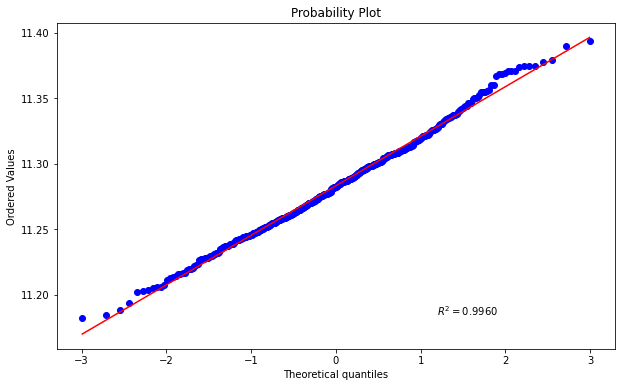

In [66]:
plt.figure(figsize = (10, 6))
(osm, osr), (slope, intercept, r) = stats.probplot(clicks_control_means, plot = plt, rvalue = True)
plt.show()

In [67]:
R2_means = r ** 2
R2_means

0.9959537742082024

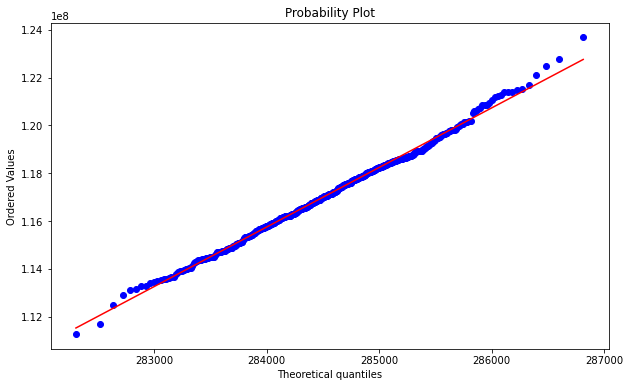

In [68]:
plt.figure(figsize = (10, 6))
(osm, osr), (slope, intercept, r) = scipy.stats.probplot(clicks_control_sums,
                                                         dist = "chi2", sparams = (len(clicks_control)-1), plot = plt)
plt.show()

In [69]:
R2_sums = r ** 2
R2_sums

0.9965174165449128

## Задание 5

In [70]:
data_exp = data[data.slot == 'exp']
data_control = data[data.slot == 'control']

In [88]:
users_exp, users_exp_counts = np.unique(data_exp.userID, return_counts = True)
users_control, users_control_counts = np.unique(data_control.userID, return_counts = True)

In [93]:
user_clicks_exp = []

for user in users_exp:
    user_clicks_exp.append(sum(data_exp[data_exp.userID == user].n_clicks.values))

In [96]:
user_clicks_control = []

for user in users_control:
    user_clicks_control.append(sum(data_control[data_control.userID == user].n_clicks.values))

In [98]:
stats.mannwhitneyu(user_clicks_exp, user_clicks_control)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

## Задание 6

In [111]:
browsers = np.unique(data.browser)

In [112]:
browsers_clicks_exp = []

for browser in browsers:
    browsers_clicks_exp.append(data_exp[data_exp.browser == browser].n_clicks.values)

In [113]:
browsers_clicks_control = []

for browser in browsers:
    browsers_clicks_control.append(data_control[data_control.browser == browser].n_clicks.values)

In [117]:
browsers_clicks_exp

[array([ 2,  4, 22, ...,  3,  0,  1], dtype=int64),
 array([ 7, 63, 83, ...,  1,  1,  0], dtype=int64),
 array([23,  7, 39, ...,  4,  4,  3], dtype=int64),
 array([ 4, 65,  1, ...,  6,  0,  2], dtype=int64),
 array([ 2, 21, 25, ...,  1,  2,  0], dtype=int64),
 array([ 3, 29, 54, ...,  0,  2,  0], dtype=int64)]

In [118]:
browsers_clicks_control

[array([2, 0, 4, ..., 3, 5, 1], dtype=int64),
 array([25,  1, 54, ...,  2,  1,  0], dtype=int64),
 array([ 9,  3,  5, ...,  0, 11, 10], dtype=int64),
 array([  7, 173,  11, ...,   2,   3,   4], dtype=int64),
 array([36, 72,  1, ...,  4,  1,  1], dtype=int64),
 array([12,  4, 22, ...,  1,  0,  2], dtype=int64)]

In [115]:
pvalues = []

for browser_clicks_exp, browser_clicks_control in zip(browsers_clicks_exp, browsers_clicks_control):
    pvalues.append(stats.mannwhitneyu(browser_clicks_exp, browser_clicks_control)[1])

In [116]:
pvalues

[0.0,
 0.03740060143010802,
 0.0272438604197241,
 0.45366656388735377,
 0.2574055152210032,
 0.40760617658454984]

In [123]:
import statsmodels.stats.multitest as smm

In [124]:
reject, p_corrected, a1, a2 = smm.multipletests(pvalues, alpha = 0.05, method = 'holm') 

In [127]:
reject

array([ True, False, False, False, False, False])

In [128]:
browsers[0]

'Browser #14'

## Задание 7

In [143]:
parts_exp = []
parts_control = []

for browser in browsers:
    parts_exp.append(100 * sum(data_exp[data_exp.browser == browser].n_nonclk_queries.values) /
                     sum(data_exp[data_exp.browser == browser].n_queries.values))
    parts_control.append(100 * sum(data_control[data_control.browser == browser].n_nonclk_queries.values) /
                     sum(data_control[data_control.browser == browser].n_queries.values))

In [144]:
parts_exp

[43.755617361273295,
 36.93741284866483,
 44.982746948554706,
 38.97737648371716,
 39.85394721969546,
 45.14294190358467]

In [145]:
parts_control

[57.59041136008114,
 36.29936674628209,
 45.96274717919465,
 40.540484743383296,
 40.593976593513354,
 46.97092963514274]

In [146]:
changes = [abs(x - y) for x, y in zip(parts_exp, parts_control)]
for i, change in enumerate(changes):
    print(browsers[i], ':', change.round(4))

Browser #14 : 13.8348
Browser #17 : 0.638
Browser #2 : 0.98
Browser #20 : 1.5631
Browser #22 : 0.74
Browser #4 : 1.828


In [147]:
browsers[np.argmax(changes)]

'Browser #14'